# Wilcoxon Rank Sum Test / U-Test

## Assumptions

The t-test is not very tolerant for deviation from the normal distribution. The Wilcoxon Rank Sum Test (also known as U-Test) is used with consideration of an unknown distribution. Assumptions for this test are:

   * **Homogeneity in variances**
   
   * **At least ordinal scaling**
   
   * **Independent data**
   
Wilcoxon- and U-Test are actually two different tests. They were invented indepently, and the test statistic is computed in two different ways. However, the result should be identical. However, in python, I observed inconsistencies. I recommend to use the U-Test function because it is consistent with the output of R.


## Implementation

### Function <tt>scipy.stats.mannwhitneyu()</tt>

    scipy.stats.mannwhitneyu(x, y, use_continuity, alternative="two-sided")
   
<tt>x</tt> and <tt>y</tt> are expected to be numpy arrays with sample values. 

<tt>alternative</tt> hypothesis could also be <tt>less</tt> or <tt>greater</tt>. 

<tt>use_continuity</tt> states whether continuity correction should be applied.

## Example: Mechanical Stress

"A plant physiologist conducted an experiment to determine whether mechanical stress can retard the growth of soybean plants. Young plants were randomly allocated in two groups of 13 plants each. Plants in one group were mechanically agitated by shaking for 20 minutes twice daily, while plants in the other group were not agitated. After 16 days of growth, the total stem length (cm) of each plant was measured", with the result given in the data below (Pappas et al.and Mitchell, 1984, raw data published in Samuels and Wittmer., 2003, p. 302).

In [1]:
import pandas as pd

ret = pd.read_csv('data/retardant.csv', sep='\t')
ret

,treatment,response
0,control,25.2
1,control,29.5
2,control,30.1
3,control,30.1
4,control,30.2
5,control,30.2
6,control,30.3
7,control,30.6
8,control,31.1
9,control,31.2


### Statistical Analysis

Previous research indicated that mechanically stressed plants tend to be shorter than their non stressed relatives  $\Longrightarrow$ one-sided test with the following hypotheses:

$$H_{0}: F_{control}(y) \leq F_{stress}(y)$$

$$H_{1}: F_{control}(y) > F_{stress}(y)$$

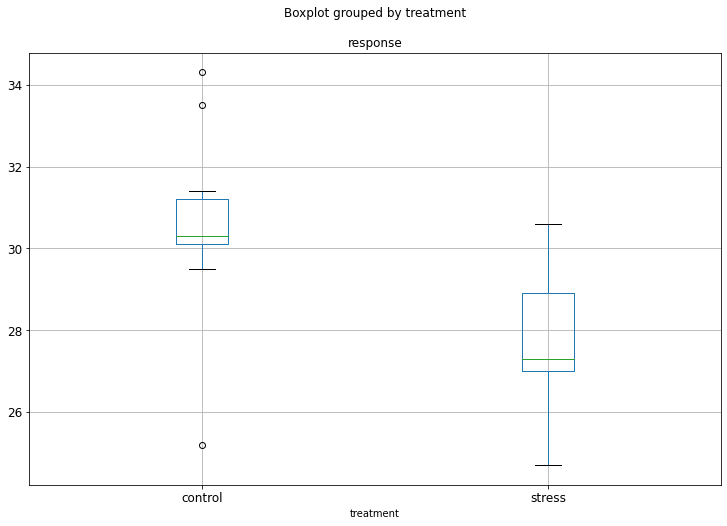

In [2]:
import matplotlib.pyplot as plt

# plot to check variances
fig, ax = plt.subplots(figsize=(12,8))
bp = ret.boxplot(column=['response'], by='treatment', fontsize='large', ax=ax)

   * **Continuous data** (length measured in cm).
   
   * **Homogeneity of variances** is critical, tolerance is assumed.
   
   * **Independent data** (no fitted pairs, single plants have been measured independent from each other).
   
Number of replicates is 13. 

In [3]:
import scipy
import scipy.stats

# spliting data into two arrays
X1 = ret[ret['treatment'] == 'control']['response']
X2 = ret[ret['treatment'] == 'stress']['response']

print(scipy.stats.mannwhitneyu(X1, X2, alternative='greater', use_continuity = False)) # asymptotic p-value

MannwhitneyuResult(statistic=148.5, pvalue=0.000512204752607433)


The extremely small p-value of 0.000512204752607433 leads in this case to the conclusion that plants exposed to seismic stress are highly significantly shorter than the nonstressed control plants.

Due to the small number of replicates, an exact p-value would be more adequate. In Scipy, that is implemented in stats.wilcoxon - but for whatever reason, this returns slightly different results than R. At this point in time, I recommend to use R for exact Wilcoxon tests/small samples.

<font size="3"><div class="alert alert-warning"><b>Exercise 7.1:</b> <br> 
"A researcher investigated the effect of green and red light on the growth rate of soybean plants. End point was the plant height two weeks after germination (measured in inches). The different light colors were produced by the usage of thin colored plastic as used for e.g. theater spot lights" (data shown below, Gent, 1999, cited from Samuels and Wittmer, 2003, p. 243).

   * Which test is suitable for the evaluation of this data?
    
   * Do you test one- or two-sided?
    
   * Which are your hypotheses?
    
   * Implement the approximate test and interpret the output!
</div>
</font>

In [4]:
import pandas as pd

light = pd.read_csv('data/light.csv', sep='\t')
light

,color,height
0,red,8.4
1,red,8.4
2,red,10.0
3,red,8.8
4,red,7.1
5,red,9.4
6,red,8.8
7,red,4.3
8,red,9.0
9,red,8.4


<font size="3">
<b>Try it yourself:</b></font>

**Example Solution:**

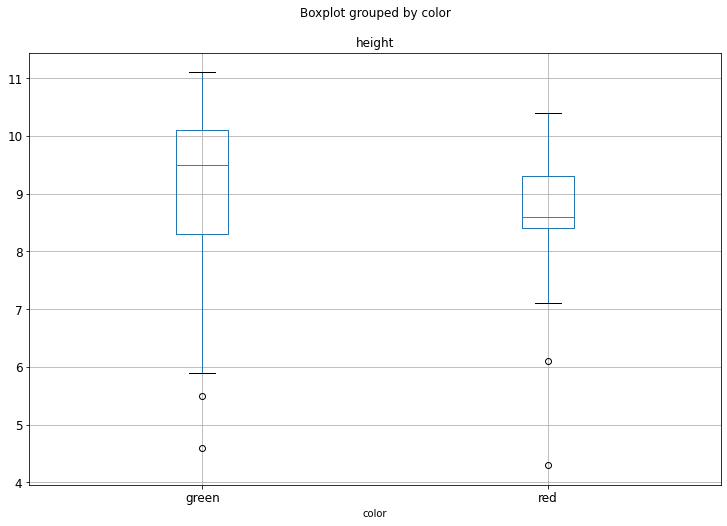

In [5]:
# plot to check variances
fig, ax = plt.subplots(figsize=(12,8))
bp = light.boxplot(column=['height'], by='color', fontsize='large', ax=ax)

   * Unknown distribution (data is not normal distributed due to outliers and an asymmetric median in boxplot).

   * Homogeneity of variances is critical.
   
   * Continuous data (height measured in inches). 
   
$\Longrightarrow$ Two-sided Wilcoxon Rank Sum Test. 

$$H_{0}: F_{red}(y) = F_{green}(y)$$

$$H_{1}: F_{red}(y) \neq F_{green}(y)$$

In [6]:
import scipy
import scipy.stats

# spliting data into two arrays
X1 = light[light['color'] == 'red']['height']
X2 = light[light['color'] == 'green']['height']

print(scipy.stats.mannwhitneyu(X1, X2, use_continuity = False)) # asymptotic p-value

MannwhitneyuResult(statistic=153.0, pvalue=0.06349976465147565)


Soybean plants treated with red light do not differ significantly in height from plants treated with green light. The $H_{0}$-hypothesis cannot be rejected.